Data wrangling with pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("seattle-weather.csv")

In [3]:
df.shape #returns the number of rows and columns

(1461, 6)

In [4]:
df.info() #returns the information in the database like non-null values, memory usage, dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
df.describe() #returns statistic summary of numeric values in df

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df  #displays dataframe

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
pd.set_option("display.max_rows", 20)

Renaming columns requires re-assignment of the dataframe

In [8]:
df=df.rename(columns= {"date": "datetime"})
df

,datetime,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [9]:
df.columns= [f"column {_}" for _ in range(1,7)]
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [10]:
df= df.set_index("column 1")
df.index.name= "new id"
df

,column 2,column 3,column 4,column 5,column 6
new id,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [11]:
df= df.reset_index()
df

,new id,column 2,column 3,column 4,column 5,column 6
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [12]:
df= pd.read_csv("seattle-weather.csv")

Adding and dropping columns

In [13]:
df['visibility'] = 9
df['air pressure'] = 1019
df

,date,precipitation,temp_max,temp_min,wind,weather,visibility,air pressure
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,9,1019
1,2012-01-02,10.9,10.6,2.8,4.5,rain,9,1019
2,2012-01-03,0.8,11.7,7.2,2.3,rain,9,1019
3,2012-01-04,20.3,12.2,5.6,4.7,rain,9,1019
4,2012-01-05,1.3,8.9,2.8,6.1,rain,9,1019
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,9,1019
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,9,1019
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,9,1019
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,9,1019


In [14]:
df.drop(columns= ['air pressure','visibility'])
df

,date,precipitation,temp_max,temp_min,wind,weather,visibility,air pressure
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,9,1019
1,2012-01-02,10.9,10.6,2.8,4.5,rain,9,1019
2,2012-01-03,0.8,11.7,7.2,2.3,rain,9,1019
3,2012-01-04,20.3,12.2,5.6,4.7,rain,9,1019
4,2012-01-05,1.3,8.9,2.8,6.1,rain,9,1019
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,9,1019
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,9,1019
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,9,1019
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,9,1019


In [15]:
df.drop(index= range(0, 10))

,date,precipitation,temp_max,temp_min,wind,weather,visibility,air pressure
10,2012-01-11,0.0,6.1,-1.1,5.1,sun,9,1019
11,2012-01-12,0.0,6.1,-1.7,1.9,sun,9,1019
12,2012-01-13,0.0,5.0,-2.8,1.3,sun,9,1019
13,2012-01-14,4.1,4.4,0.6,5.3,snow,9,1019
14,2012-01-15,5.3,1.1,-3.3,3.2,snow,9,1019
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,9,1019
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,9,1019
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,9,1019
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,9,1019


Reshaping dataframes is done using .melt(), .pivot(), .pivot_table()

Working with multiple dataframes with .concat()

In [16]:
df1 = pd.DataFrame({'A': [1, 3, 5],
                    'B': [2, 4, 6]})
df2 = pd.DataFrame({'A': [7, 9, 11],
                    'B': [8, 10, 12]})

In [17]:
df1

,A,B
0,1,2
1,3,4
2,5,6


In [18]:
df2

,A,B
0,7,8
1,9,10
2,11,12


In [19]:
pd.concat((df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12


In [20]:
pd.concat((df1, df2),axis=1, ignore_index=True)

,0,1,2,3
0,1,2,7,8
1,3,4,9,10
2,5,6,11,12


Joining dataframes with .merge()

In [21]:
df1= pd.DataFrame({'name': ['Magneto', 'Storm', 'Mystique', 'Batman', 'Joker', 'Catwoman', 'Hellboy'],
                   'alignment': ['bad', 'good', 'bad', 'good', 'bad', 'bad', 'good'],
                   'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male'],
                   'publisher': ['Marvel', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'Dark Horse Comics']})
df2= pd.DataFrame({'publisher': ['DC', 'Marvel', 'Image'],
                   'year_founded': [1934, 1939, 1992]})

In [22]:
pd.merge(df1, df2, how='inner', on='publisher') #inner join returns all df1 values found in df2

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939
1,Storm,good,female,Marvel,1939
2,Mystique,bad,female,Marvel,1939
3,Batman,good,male,DC,1934
4,Joker,bad,male,DC,1934
5,Catwoman,bad,female,DC,1934


In [23]:
pd.merge(df1, df2, how='outer', on='publisher') #outer join returns all values in df1 and df2 with NaN where values are unavailable

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse Comics,NaN
7,NaN,NaN,NaN,Image,1992.0


In [24]:
pd.merge(df1, df2, how='left') #left join returns all rows on df1, and those in df2 that match df1 

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse Comics,NaN


In [25]:
pd.merge(df1, df2, how='outer', indicator=True)

,name,alignment,gender,publisher,year_founded,_merge
0,Magneto,bad,male,Marvel,1939.0,both
1,Storm,good,female,Marvel,1939.0,both
2,Mystique,bad,female,Marvel,1939.0,both
3,Batman,good,male,DC,1934.0,both
4,Joker,bad,male,DC,1934.0,both
5,Catwoman,bad,female,DC,1934.0,both
6,Hellboy,good,male,Dark Horse Comics,NaN,left_only
7,NaN,NaN,NaN,Image,1992.0,right_only


In [26]:
df= pd.read_csv("seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [27]:
df[['precipitation']].apply(np.cos)

,precipitation
0,1.000000
1,-0.095429
2,0.696707
3,0.120062
4,0.267499
...,...
1456,-0.678720
1457,0.070737
1458,1.000000
1459,1.000000


Create a function to apply to your data

In [28]:
def temp_in_farenheit(t):
    return (t*9/5)+ 32

df[['temp_max']].apply(temp_in_farenheit)

,temp_max
0,55.04
1,51.08
2,53.06
3,53.96
4,48.02
...,...
1456,39.92
1457,41.00
1458,44.96
1459,42.08


In [29]:
df[['temp_max']].map(int)

,temp_max
0,12
1,10
2,11
3,12
4,8
...,...
1456,4
1457,5
1458,7
1459,5


In [30]:
temp_type= df[['temp_max']].astype(float)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Grouping

In [31]:
dfg= df.groupby(by='weather')
dfg

In [32]:
dfg.get_group('rain')

,date,precipitation,temp_max,temp_min,wind,weather
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1456,2015-12-27,8.6,4.4,1.7,2.9,rain


In [33]:
dfg.aggregate(['count', 'sum'])

date                                                     \
        count                                                sum   
weather                                                            
drizzle    53  2012-01-012012-01-272012-02-152012-03-262012-0...   
fog       101  2012-07-112012-09-172012-09-232012-09-242012-1...   
rain      641  2012-01-022012-01-032012-01-042012-01-052012-0...   
snow       26  2012-01-142012-01-152012-01-162012-01-172012-0...   
sun       640  2012-01-082012-01-112012-01-122012-01-132012-0...   

        precipitation         temp_max          temp_min          wind          
                count     sum    count      sum    count     sum count     sum  
weather                                                                         
drizzle            53     0.0       53    844.1       53   376.9    53   125.5  
fog               101     0.0      101   1692.5      101   805.9   101   250.6  
rain              641  4203.6      641   8624.4      641  4864.4   641  2352.4  
snow               26   222.4       26    144.9       26     3.8    26   114.7  
sun               640     0.0      640  12711.6      640  5980.0   640  1892.1

Missing values can use .isnull() or .info() or .any()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [155]:
df[df.isnull().any(axis= 1)] #axis1 is column, axis0 is row

,country,food_category,consumption,co2_emmission


Then either drop null or impute

In [36]:
df.dropna()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [37]:
df= pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, np.nan, np.nan, 5],
                  [np.nan, 3, np.nan, 4]],
                  columns= list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [38]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [39]:
df.fillna(df.mean())

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [40]:
print(f"Back fill or fill upwards from last non na value: {df.bfill()}")
print(f"Forward fill or fill downwards to next non na value: {df.ffill()}")

Back fill or fill upwards from last non na value:      A    B   C  D
0  3.0  2.0 NaN  0
1  3.0  4.0 NaN  1
2  NaN  3.0 NaN  5
3  NaN  3.0 NaN  4
Forward fill or fill downwards to next non na value:      A    B   C  D
0  NaN  2.0 NaN  0
1  3.0  4.0 NaN  1
2  3.0  4.0 NaN  5
3  3.0  3.0 NaN  4


In [41]:
pip install seaborn

In [42]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})

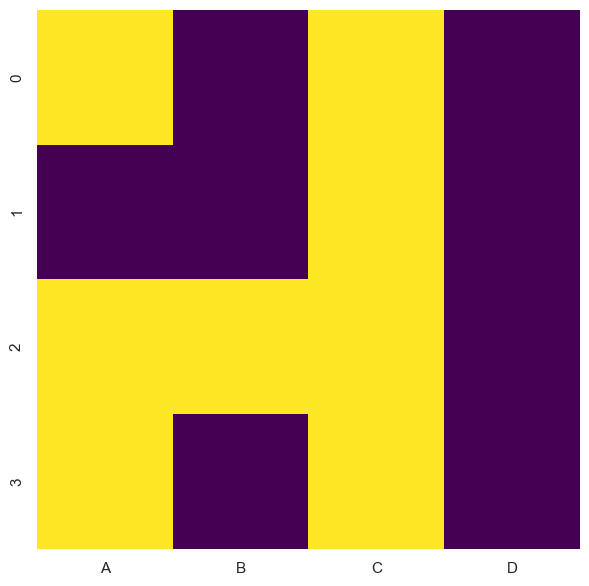

In [43]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False);

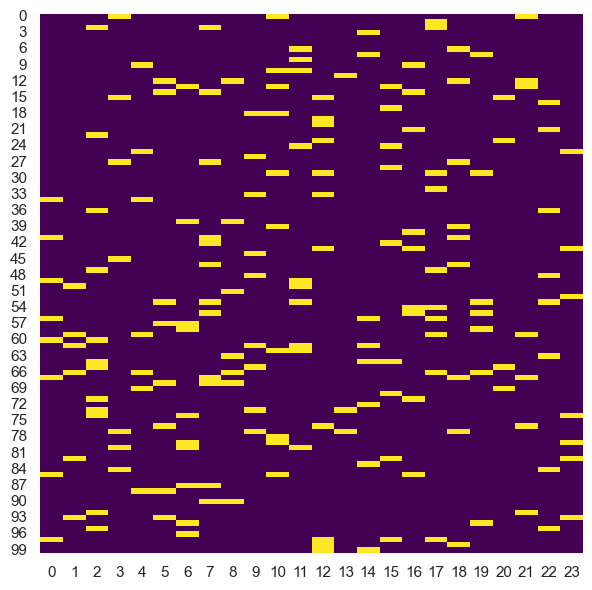

In [44]:
np.random.seed(2024)
npx= np.zeros((100,24))
mask= np.random.choice([True, False], npx.shape, p=[.1, .9])
npx[mask]= np.nan
sns.heatmap(pd.DataFrame(npx).isnull(), cmap= 'viridis', cbar= False);

Let's do an exercise to test the knowledge of basic data wrangling with pandas

In [45]:
#1. Import pandas as pd
import pandas as pd

In [46]:
#2. Import dataset from url
url= "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv"

df= pd.read_csv(url)
df


,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27


3.What country consumes the most food per person per year(across all food categories)?

In [97]:
dfg= df.groupby(by= 'food_category')
dfg.aggregate('max')

,country,consumption,co2_emmission
food_category,,,
Beef,Zimbabwe,55.48,1712.00
Eggs,Zimbabwe,19.15,17.59
Fish,Zimbabwe,179.71,286.94
Lamb & Goat,Zimbabwe,21.12,739.62
Milk - inc. cheese,Zimbabwe,430.76,613.57
Nuts inc. Peanut Butter,Zimbabwe,23.03,40.76
Pork,Zimbabwe,67.11,237.54
Poultry,Zimbabwe,62.50,67.14
Rice,Zimbabwe,171.73,219.76


4.What food category is the biggest contributor to the above country's consumption total?

In [117]:
dfg.aggregate('max').idxmax()


country                        Beef
consumption      Milk - inc. cheese
co2_emmission                  Beef
dtype: object

5.Which country produces the most kg co2 per person per year

In [153]:
dfg.idxmax().max()


country          1077
consumption      1427
co2_emmission    1427
dtype: int64

In [151]:
df.iloc[1427]['country']

'Bangladesh'